Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
import seaborn as sns

Importing Dataset

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Printing the shape of the dataset

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualization

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Images are only interpretable by machines after they have been transformed to numerical values based on pixel brightness. The brightest pixels in a grayscale image are represented by 0.256, while the lowest-resolution pixels are represented by 0.0.

We have multiple techniques to distribute the real image in a way that is readable by humans. Using the matplotlib function imshow() is one of them.


First, let's use numpy random to generate a random number. Then, each time we receive a new image, we can use imshow() to view the random number from our train dataset.


First - let‘s generate a random number with numpy random, so everytime we get a different image and use imshow() to visualize the random number from our train dataset

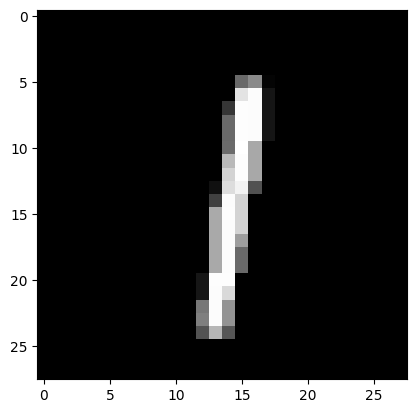

In [5]:
random_nr = np.random.randint(0, 60000)

plt.imshow(X_train[random_nr], cmap="gray");

Visualize one example per each digit using a for loop and matplotlib

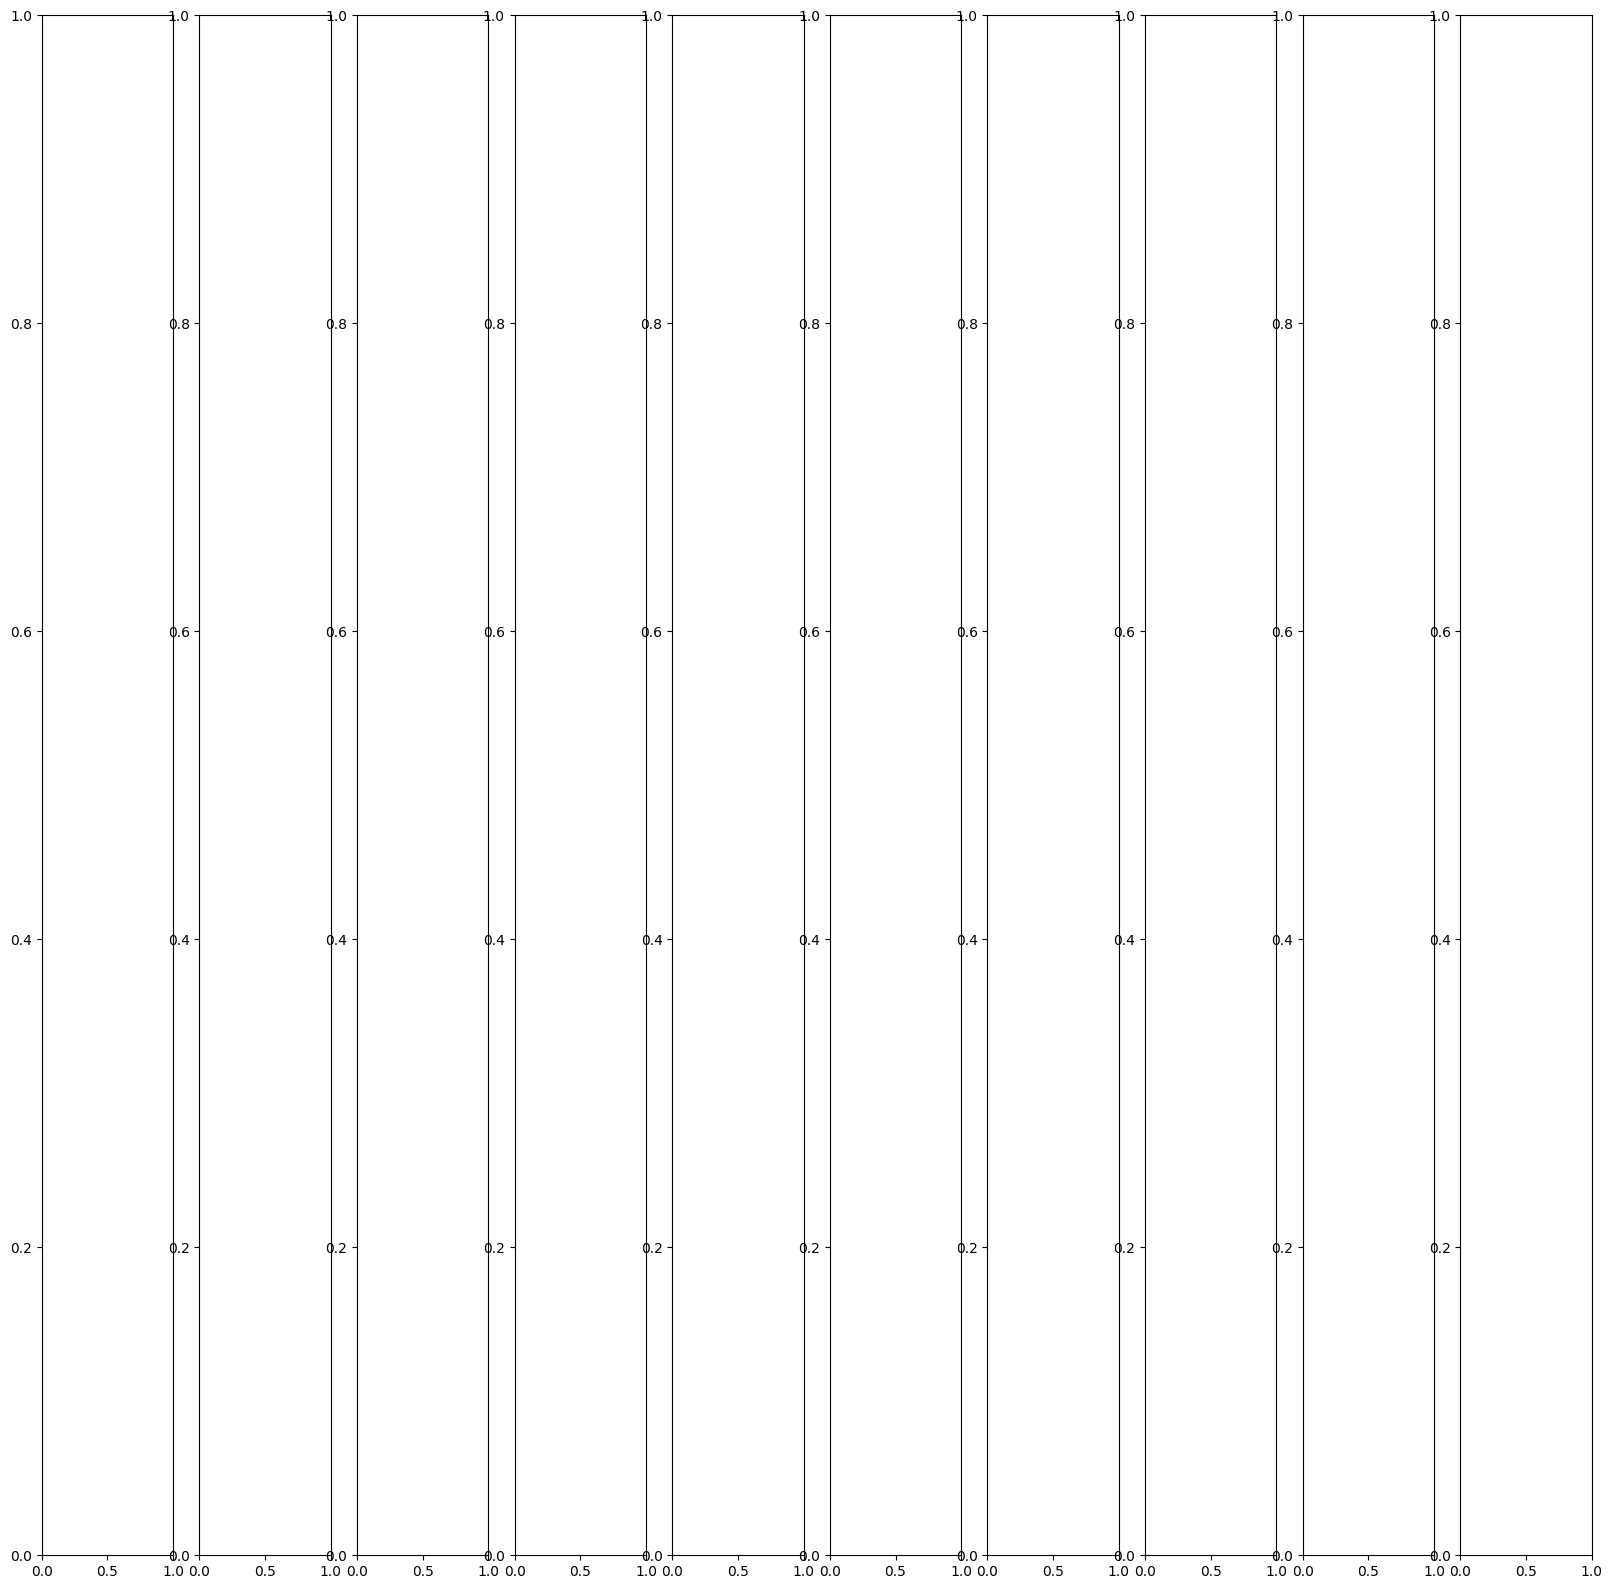

In [6]:
num_classes = 10

#Create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) #here the row is 1 and columns are 10

Loop through 10 classes from train dataset and add labels from test dataset

In [7]:
for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
num_classes

10

From classes to categories
The next action is to create binary categories out of our ten classes. For instance, a model that assigns a number three to a digit on an image will correlate with 1, whereas other categories will connect with 0. similar to this

[0] [0] [0] [1] [0] [0] [0] [0] [0] [0]

We will utilize the to_categorical() function of a numpy utility package from keras to convert classes to categories. Two arguments are accepted by to_categorical(). The vector, which contains integers representing the various classes in the data, is the first parameter. The number of classes is the second argument.


In [11]:
from keras.utils import to_categorical

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [14]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Pre-processing of data Preprocessing the data is the next stage. We must normalize the data and flatten it into a vector in order to let the machine learning algorithm better comprehend our data.

Scaling of features By using feature scaling, we may increase the uniformity of the dataset's many variables and enhance the machine learning algorithm's performance. This is significant because characteristics with higher values are more likely to be interpreted as more significant by the algorithm than features with lower values. In the event if our variables "age" and "height" have respective ranges of values (15, 26, 34, 56, 61) and (165, 172, 184, 201),

Due to the greater numbers, the machine learning algorithm may become biased and perceive "height" as more significant than "age". We must perform feature scaling in order to negate that.

There are various ways to go about feature scaling:

uniformity
We center every number in standardization around 0.

Normalization
Data normalization involves rescaling all values to fall between 0 and 1. Another name for it is Min-Max scaling. Since normalization is a more widely used technique in image processing, we will also employ it today.

In image processing, normalization changes the range of pixel intensity values, and fits them in a range between 0 and 1 by dividing the image by 255 (the maximum pixel value).

Reshape data to a vector (flatten)
The primary reason behind why we flatten images (multi-dimensional arrays) into 1-D array is because they take less memory, and as a result reduce the amount of time needed to train the model. There are two numpy methods we can choose from:

numpy.flatten()
This method flattens the array regardless of its shape, and has no required parameters.

numpy.reshape()
The reshape method converts an array from one shape to another shape, and takes two parameters: the array we want to reshape, and it‘s new shape as a tuple (num1, num2).

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [18]:
X_train.shape

(60000, 784)

Creation of the custom dataset with make_blobs and plot it in graph

In [19]:
from sklearn.datasets import make_blobs

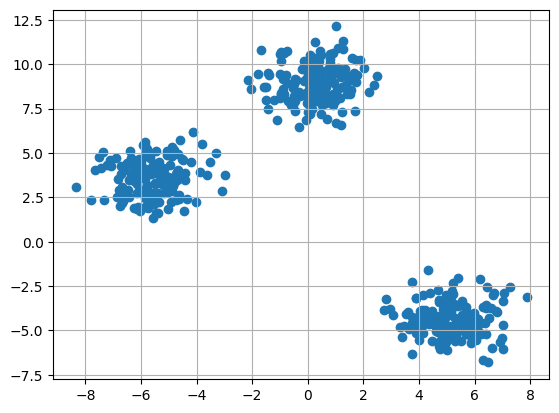

In [20]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

K-means clustering is an unsupervised machine learning algorithm that groups unlabeled data into k number clusters, where k is a user-defined integer. K-means is an iterative algorithm that makes use of cluster centroids to divide the data in a way that groups similar data into groups.

K-means clustering starts by taking k random points, and marks these points as centroids of k clusters. It then calculates the Euclidean distance for each remaining data point from each of those centroids and assigns each data point to its closest cluster (based on the Euclidean distance from the centroid). Once a new point is added to the cluster, it recalculates the centroid by taking the mean of all the vectors inside the group, and then recursively calculates distance again. Then, the new centroid is recalculated, and this is repeated until all data points are assigned to a cluster.

In order for K-means clustering to be effective, however, it is imperative to first determine the optimal value for k.

In [21]:
k = 10

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []},
 3: {'center': array([-1.33144319, -0.43023013]), 'points': []},
 4: {'center': array([ 0.47220939, -0.35227962]), 'points': []},
 5: {'center': array([-1.99014048,  1.53612873]), 'points': []},
 6: {'center': array([ 1.53979015, -0.79836124]), 'points': []},
 7: {'center': array([0.35832746, 1.91370766]), 'points': []},
 8: {'center': array([ 1.38037529, -1.73969824]), 'points': []},
 9: {'center': array([-0.82102214, -0.84826224]), 'points': []}}

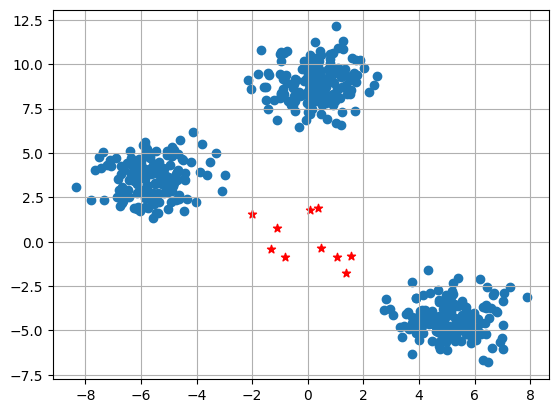

In [22]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

The plot displays a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the initial cluster centers (red stars) generated for K-means clustering.

Define Euclidean distance

In [23]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

Create the function to Assign and Update the cluster center
The E-step assigns data points to the nearest cluster center, and the M-step updates cluster centers based on the mean of assigned points in K-means clustering.

In [24]:
#Implementing E step function
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters


In [25]:
#Implementing the M-Step function
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

Creation of the function to Predict the cluster for the datapoints

In [26]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [27]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

Plotting the data points with their predicted cluster center

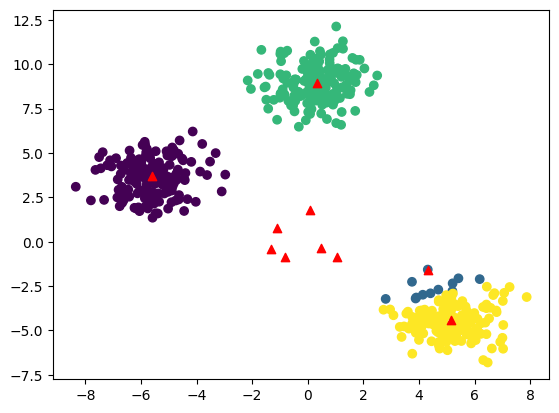

In [28]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

The above plot shows data points colored by their predicted clusters. The red markers represent the updated cluster centers after the E-M steps in the K-means clustering algorithm.

In [29]:
from sklearn.cluster import KMeans

In [30]:
X_train.shape

(60000, 784)

In [31]:
y_train.shape

(60000, 10)

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for the best value for K based on our data.

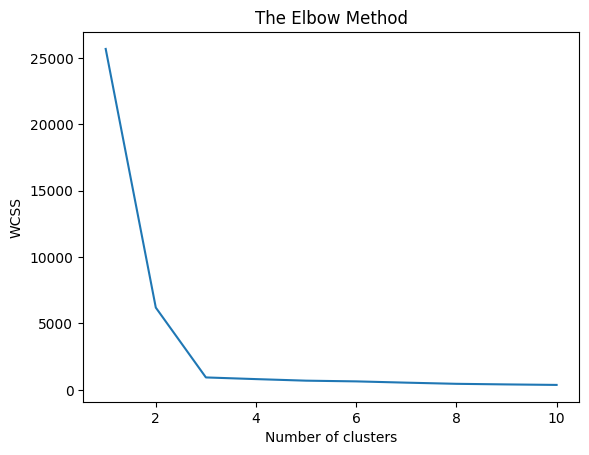

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=10)
Kmean.fit(X)
## Predictions
y_pred = Kmean.predict(X)

In [34]:
y_pred

array([9, 6, 2, 4, 2, 8, 5, 4, 3, 3, 3, 0, 6, 2, 6, 2, 6, 3, 6, 1, 5, 7,
       3, 3, 0, 2, 5, 8, 3, 1, 3, 5, 3, 5, 1, 7, 7, 2, 0, 7, 5, 3, 1, 1,
       5, 0, 1, 9, 9, 8, 4, 5, 5, 6, 5, 6, 4, 8, 4, 1, 7, 1, 7, 1, 4, 8,
       6, 2, 1, 4, 7, 4, 6, 2, 0, 7, 1, 4, 1, 5, 8, 0, 2, 3, 0, 1, 3, 9,
       1, 9, 5, 4, 0, 3, 5, 4, 4, 8, 2, 1, 5, 9, 2, 3, 7, 5, 1, 7, 2, 9,
       0, 8, 3, 8, 3, 6, 7, 0, 2, 7, 6, 7, 1, 1, 3, 2, 4, 9, 6, 8, 5, 9,
       9, 8, 4, 1, 2, 1, 9, 5, 4, 0, 0, 8, 0, 4, 4, 2, 6, 2, 5, 6, 5, 8,
       0, 6, 2, 4, 5, 4, 2, 7, 1, 6, 4, 4, 2, 4, 2, 1, 6, 0, 1, 0, 9, 4,
       2, 0, 2, 0, 2, 5, 4, 9, 0, 1, 3, 3, 5, 0, 6, 0, 3, 6, 8, 5, 1, 5,
       6, 6, 8, 0, 7, 6, 4, 4, 1, 0, 7, 6, 7, 8, 0, 8, 7, 3, 2, 1, 1, 4,
       8, 3, 3, 6, 7, 0, 9, 8, 4, 6, 4, 3, 9, 1, 7, 1, 2, 4, 5, 6, 2, 3,
       0, 4, 6, 6, 7, 8, 4, 1, 3, 4, 1, 8, 5, 8, 0, 3, 2, 6, 1, 2, 4, 6,
       0, 0, 3, 7, 1, 0, 4, 0, 4, 1, 2, 0, 0, 2, 5, 3, 3, 0, 3, 8, 6, 4,
       8, 9, 5, 3, 1, 5, 1, 0, 0, 1, 1, 9, 2, 3, 1,

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.

In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y_pred)

0.3324955107427626

In [36]:
Sil = silhouette_score(X,y_pred)

The Davies Bouldin score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [37]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_pred)

0.9592366943034571

In [38]:
X = davies_bouldin_score(X,y_pred)

In [39]:
prediction = X * 100
prediction

95.92366943034571